### Importing the basic library

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import cv2    # Imported to use OpenCV for image processing
import easygui    # Imported to open a file box, it allows us to select any file from our system.
import imageio
import sys
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

#### Building a file box to choose a particular file

In [10]:
def upload():
    ImagePath = easygui.fileopenbox()
    cartoonify(ImagePath)

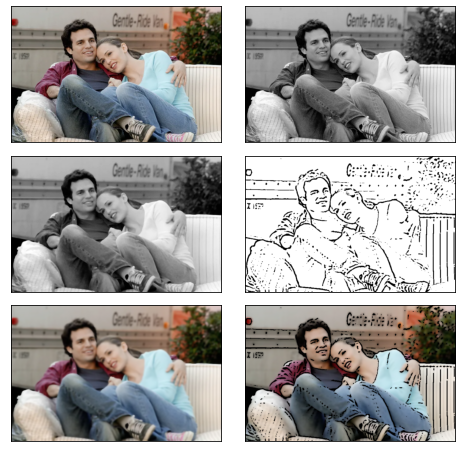

In [11]:
upload()

In [12]:
def cartoonify(ImagePath):
    # Read the Image
    originalImage = cv2.imread(ImagePath)
    originalImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)
    
    # print(Img) # Image is stored in the form of numbers
    
    # Confirm the image is choosen 
    if originalImage is None:
        print("Can't find any image. Choose the apropriate file")
        sys.exit()
        
    resized1 = cv2.resize(originalImage, (960, 620))
    #plt.imshow(Resized1, cmap='gray')
    
    # Converting the image to grayscale 
    grayScaleImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
    resized2 = cv2.resize(grayScaleImage, (960, 620))
    #plt.imshow(resized2, cmap='gray')
    
    # Applying the median blur to smoothen the image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    resized3 = cv2.resize(smoothGrayScale, (960, 620))
    
    # Retrieving the edges for cartoon effect by using thresholding technique
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
    resized4 = cv2.resize(getEdge, (960, 620))
    
    # Applying the bilateral filter to remove noise and keep edge sharp as required
    colorImage = cv2.bilateralFilter(originalImage, 9, 300, 300)
    resized5 = cv2.resize(colorImage, (960, 620))
    
    # masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
    resized6 = cv2.resize(cartoonImage, (960, 620))
    
    # Plotting the whole transition
    images = [resized1, resized2, resized3, resized4, resized5, resized6]
    fig, axes = plt.subplots(3, 2, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        
    # Save buttom
    plt.show()

In [13]:
def save(resized6, ImagePath):
    # Saving the image using imwrite()
    newName = "CartoonifiedImage"
    path1 = os.path.dirname(ImagePath)
    extension = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(reized6, cv2.COLOR_RGB2BGR))
    I = "Image saved by name "+newName+" at "+path
    tk.messagebox.showinfo(title=None, message=I)

In [14]:
top = tk.Tk()
top.geometry("400x400")
top.title("Cartoonify Your Image !")
top.configure(background="white")
label = Label(top, background="#CDCDCD", font=('calibri', 20, "bold"))


In [15]:
upload = Button(top, text="Cartoonify an Image", command=upload, padx=10, pady=5)
upload.configure(background="#364156", foreground="white", font=("calibri", 10, "bold"))
upload.pack(side=TOP, pady=50)

In [16]:
save1 = Button(top, text="Save cartoon image", command=lambda: save(ImagePath, resized6), padx=30, pady=5)
save1.configure(background="#364156", foreground="white", font=("calibri", 10, "bold"))
save1.pack(side=TOP, pady=50)

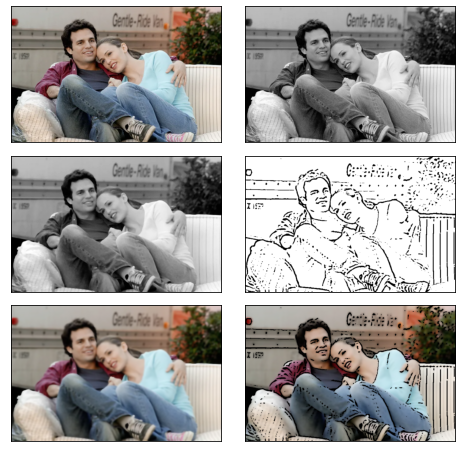

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Acer\AppData\Local\Temp/ipykernel_9760/2351315243.py", line 1, in <lambda>
    save1 = Button(top, text="Save cartoon image", command=lambda: save(ImagePath, resized6), padx=30, pady=5)
NameError: name 'ImagePath' is not defined


In [17]:
top.mainloop()